## Edgar Moises Hernandez-Gonzalez
### 07/11/19
### Clasificar CIFAR10 con CNN
#### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [4]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)        0

In [0]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 20,
                    batch_size=32, validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 13s 267us/sample - loss: 1.2651 - acc: 0.5487 - val_loss: 1.6193 - val_acc: 0.4758
Epoch 2/20
50000/50000 [==============================] - 11s 229us/sample - loss: 0.9173 - acc: 0.6767 - val_loss: 1.0276 - val_acc: 0.6367
Epoch 3/20
50000/50000 [==============================] - 11s 228us/sample - loss: 0.7817 - acc: 0.7272 - val_loss: 0.9380 - val_acc: 0.6698
Epoch 4/20
50000/50000 [==============================] - 12s 231us/sample - loss: 0.6881 - acc: 0.7587 - val_loss: 0.9533 - val_acc: 0.6761
Epoch 5/20
50000/50000 [==============================] - 11s 228us/sample - loss: 0.6209 - acc: 0.7839 - val_loss: 0.8529 - val_acc: 0.7077
Epoch 6/20
50000/50000 [==============================] - 12s 230us/sample - loss: 0.5597 - acc: 0.8028 - val_loss: 1.0468 - val_acc: 0.6628
Epoch 7/20
50000/50000 [==============================] - 11s 229us/sample - loss: 0.5083 - acc: 0.8211 

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 90us/sample - loss: 1.2355 - acc: 0.7059
Test loss: 1.2354537770748137
Test accuracy: 0.7059


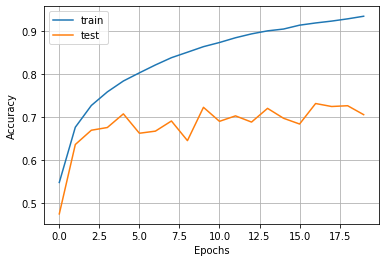

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

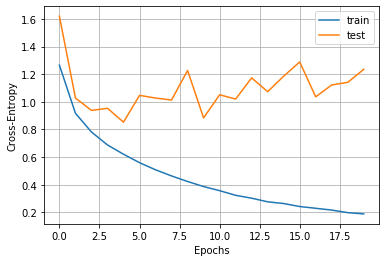

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [14]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[748  15  37  48  22   6  12  12  86  14]
 [ 33 802   8  24   9   9   8   6  60  41]
 [ 63   4 545 113  66  64  89  35  18   3]
 [ 15   6  47 664  55  90  72  27  21   3]
 [ 18   3  59 121 630  37  85  33  14   0]
 [ 15   3  30 254  34 569  41  42   9   3]
 [  4   5  22  75  14  18 850   5   7   0]
 [ 14   3  15  89  66  61  14 720   9   9]
 [ 53  13  11  32   5   5  11   4 850  16]
 [ 52  81  13  47   6   9  22  13  76 681]]


In [15]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1000
           1       0.86      0.80      0.83      1000
           2       0.69      0.55      0.61      1000
           3       0.45      0.66      0.54      1000
           4       0.69      0.63      0.66      1000
           5       0.66      0.57      0.61      1000
           6       0.71      0.85      0.77      1000
           7       0.80      0.72      0.76      1000
           8       0.74      0.85      0.79      1000
           9       0.88      0.68      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



In [16]:
num_test = 28
print("Etiqueta verdadera", y_test[num_test])
prediccion = model.predict(x_test[num_test].reshape(1,32,32,3))
print("Etiqueta predicha", prediccion.argmax())

Etiqueta verdadera [9]
Etiqueta predicha 9


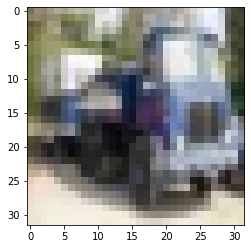

In [17]:
plt.imshow(x_test[num_test])
plt.show()